In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
zip_path = '/content/drive/MyDrive/Dossier sans titre/data.zip'
extract_path = '/content/data'  # Spécifiez le chemin où vous voulez extraire les fichiers

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data1 = pd.read_csv('/content/data/artists.csv')
data1.head()

<ipython-input-5-51f15ad1729a>:1: DtypeWarning: Columns (2,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv('/content/data/artists.csv')


,mbid,artist_mb,artist_lastfm,country_mb,country_lastfm,tags_mb,tags_lastfm,listeners_lastfm,scrobbles_lastfm,ambiguous_artist
0,cc197bad-dc9c-440d-a5b5-d52ba2e14234,Coldplay,Coldplay,United Kingdom,United Kingdom,rock; pop; alternative rock; british; uk; brit...,rock; alternative; britpop; alternative rock; ...,5381567.0,360111850.0,False
1,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,Radiohead,United Kingdom,United Kingdom,rock; electronic; alternative rock; british; g...,alternative; alternative rock; rock; indie; el...,4732528.0,499548797.0,False
2,8bfac288-ccc5-448d-9573-c33ea2aa5c30,Red Hot Chili Peppers,Red Hot Chili Peppers,United States,United States,rock; alternative rock; 80s; 90s; rap; metal; ...,rock; alternative rock; alternative; Funk Rock...,4620835.0,293784041.0,False
3,73e5e69d-3554-40d8-8516-00cb38737a1c,Rihanna,Rihanna,United States,Barbados; United States,pop; dance; hip hop; reggae; contemporary r b;...,pop; rnb; female vocalists; dance; Hip-Hop; Ri...,4558193.0,199248986.0,False
4,b95ce3ff-3d05-4e87-9e01-c97b66af13d4,Eminem,Eminem,United States,United States,turkish; rap; american; hip-hop; hip hop; hiph...,rap; Hip-Hop; Eminem; hip hop; pop; american; ...,4517997.0,199507511.0,False


In [6]:
data1.shape

(1466083, 10)

In [7]:
data2 = pd.read_csv('/content/data/dates_artists.csv')
data2.head()

<ipython-input-7-5ad3e9894b00>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv('/content/data/dates_artists.csv')


,mbid,name,begin,end
0,e2c4079c-7594-4991-bfe4-dccc2035bb64,La Lettre A Camus,NaN,NaN
1,b8cdb71e-77ea-45f1-a058-cdfce0472c18,Vital Signs,1987,2013
2,794c6bf2-3241-416f-9b8f-24e2d84a1c4b,The Stooges,1967,NaN
3,25d02331-2985-4e32-a416-a666ac5dee1f,F.R.U.I.T.S.,NaN,NaN
4,a66999a7-ae5c-460e-ba94-1a01143ae847,Snow Patrol,1994,NaN


In [8]:
data2.shape

(2425588, 4)

# fusionner des deux datasets

In [9]:
df = pd.merge(data1, data2, on='mbid', how='left')

In [10]:
df.head()

,mbid,artist_mb,artist_lastfm,country_mb,country_lastfm,tags_mb,tags_lastfm,listeners_lastfm,scrobbles_lastfm,ambiguous_artist,name,begin,end
0,cc197bad-dc9c-440d-a5b5-d52ba2e14234,Coldplay,Coldplay,United Kingdom,United Kingdom,rock; pop; alternative rock; british; uk; brit...,rock; alternative; britpop; alternative rock; ...,5381567.0,360111850.0,False,Coldplay,1996,NaN
1,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,Radiohead,United Kingdom,United Kingdom,rock; electronic; alternative rock; british; g...,alternative; alternative rock; rock; indie; el...,4732528.0,499548797.0,False,Radiohead,1991,NaN
2,8bfac288-ccc5-448d-9573-c33ea2aa5c30,Red Hot Chili Peppers,Red Hot Chili Peppers,United States,United States,rock; alternative rock; 80s; 90s; rap; metal; ...,rock; alternative rock; alternative; Funk Rock...,4620835.0,293784041.0,False,Red Hot Chili Peppers,1983,NaN
3,73e5e69d-3554-40d8-8516-00cb38737a1c,Rihanna,Rihanna,United States,Barbados; United States,pop; dance; hip hop; reggae; contemporary r b;...,pop; rnb; female vocalists; dance; Hip-Hop; Ri...,4558193.0,199248986.0,False,Rihanna,1988,NaN
4,b95ce3ff-3d05-4e87-9e01-c97b66af13d4,Eminem,Eminem,United States,United States,turkish; rap; american; hip-hop; hip hop; hiph...,rap; Hip-Hop; Eminem; hip hop; pop; american; ...,4517997.0,199507511.0,False,Eminem,1972,NaN


In [11]:
df.shape

(1466083, 13)

<Axes: >

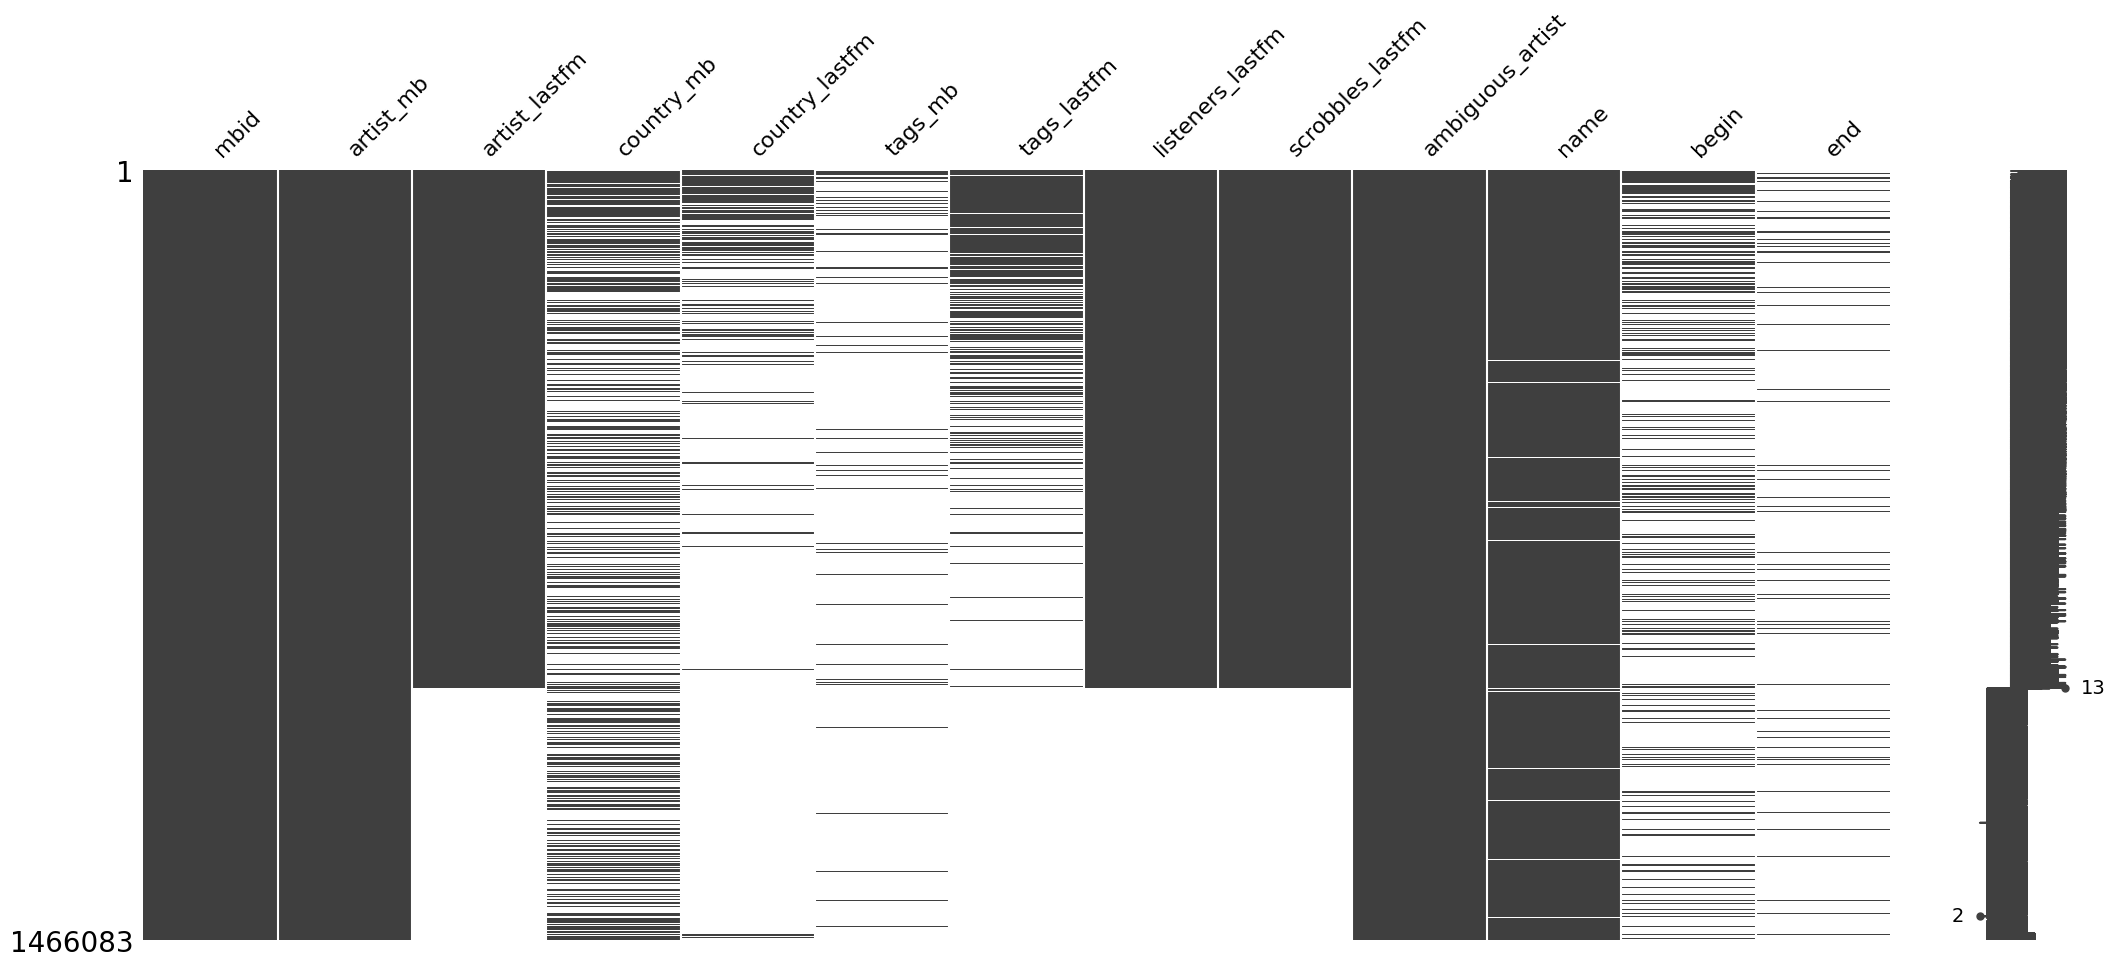

In [12]:
import missingno as msno

msno.matrix(df)

In [13]:
df['mbid'].nunique()

1466083

In [14]:
df[df['ambiguous_artist'] == True].head(5)


,mbid,artist_mb,artist_lastfm,country_mb,country_lastfm,tags_mb,tags_lastfm,listeners_lastfm,scrobbles_lastfm,ambiguous_artist,name,begin,end
73,c234fa42-e6a6-443e-937e-2f4b073538a3,Chris Brown,Chris Brown,United States,United States,pop; dance; american; hip-hop; electropop; rnb...,rnb; Hip-Hop; Chris Brown; rap; hip hop; pop; ...,2624857.0,47604118.0,True,Chris Brown,1989,NaN
74,2c1828a2-e46b-4ade-a6e9-065ca265d679,Chris Brown,Chris Brown,United States,United States,NaN,rnb; Hip-Hop; Chris Brown; rap; hip hop; pop; ...,2624857.0,47604118.0,True,Chris Brown,NaN,NaN
75,a7f9fe7b-dc45-4a18-b083-25aa667892bf,Chris Brown,Chris Brown,United States,United States,NaN,rnb; Hip-Hop; Chris Brown; rap; hip hop; pop; ...,2624857.0,47604118.0,True,Chris Brown,NaN,NaN
76,548bae0a-223e-4825-a79f-951e1f737a84,Chris Brown,Chris Brown,United States,United States,american; usa; pianist; composer; musician; am...,rnb; Hip-Hop; Chris Brown; rap; hip hop; pop; ...,2624857.0,47604118.0,True,Chris Brown,1953,NaN
77,9329ee19-26d7-40cf-8ec0-ab761cb6180e,Christopher Brown,Chris Brown,United States,United States,NaN,rnb; Hip-Hop; Chris Brown; rap; hip hop; pop; ...,2624857.0,47604118.0,True,Christopher Brown,NaN,NaN


# supprimer les lignes qui ont NaN dans les collones listeners_last_fm

In [15]:
df.drop(df.loc[df['listeners_lastfm'].isna()].index , axis=0 , inplace= True)

In [16]:
df

,mbid,artist_mb,artist_lastfm,country_mb,country_lastfm,tags_mb,tags_lastfm,listeners_lastfm,scrobbles_lastfm,ambiguous_artist,name,begin,end
0,cc197bad-dc9c-440d-a5b5-d52ba2e14234,Coldplay,Coldplay,United Kingdom,United Kingdom,rock; pop; alternative rock; british; uk; brit...,rock; alternative; britpop; alternative rock; ...,5381567.0,360111850.0,False,Coldplay,1996,NaN
1,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,Radiohead,United Kingdom,United Kingdom,rock; electronic; alternative rock; british; g...,alternative; alternative rock; rock; indie; el...,4732528.0,499548797.0,False,Radiohead,1991,NaN
2,8bfac288-ccc5-448d-9573-c33ea2aa5c30,Red Hot Chili Peppers,Red Hot Chili Peppers,United States,United States,rock; alternative rock; 80s; 90s; rap; metal; ...,rock; alternative rock; alternative; Funk Rock...,4620835.0,293784041.0,False,Red Hot Chili Peppers,1983,NaN
3,73e5e69d-3554-40d8-8516-00cb38737a1c,Rihanna,Rihanna,United States,Barbados; United States,pop; dance; hip hop; reggae; contemporary r b;...,pop; rnb; female vocalists; dance; Hip-Hop; Ri...,4558193.0,199248986.0,False,Rihanna,1988,NaN
4,b95ce3ff-3d05-4e87-9e01-c97b66af13d4,Eminem,Eminem,United States,United States,turkish; rap; american; hip-hop; hip hop; hiph...,rap; Hip-Hop; Eminem; hip hop; pop; american; ...,4517997.0,199507511.0,False,Eminem,1972,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
986755,ad2e4cde-ca76-4145-844f-169a810c3205,전- 소영,전- 소영,NaN,NaN,NaN,NaN,0.0,0.0,False,전- 소영,NaN,NaN
986756,f7cb2987-c7da-489c-bb47-abd9f892a89e,정체,정체,NaN,NaN,NaN,NaN,0.0,0.0,False,정체,NaN,NaN
986757,e235df31-63cb-4476-9ad3-4b0b4b1a086a,조진원 & 홍종임,조진원 & 홍종임,NaN,NaN,NaN,NaN,0.0,0.0,False,NaN,NaN,NaN
986758,a7177e1b-4c00-4ad0-830f-d93fd6450fc3,천상지희 다나&선데이,천상지희 다나 & 선데이,South Korea,NaN,NaN,CSJH Dana - Sunday,0.0,0.0,False,천상지희 다나&선데이,2005,NaN


<Axes: >

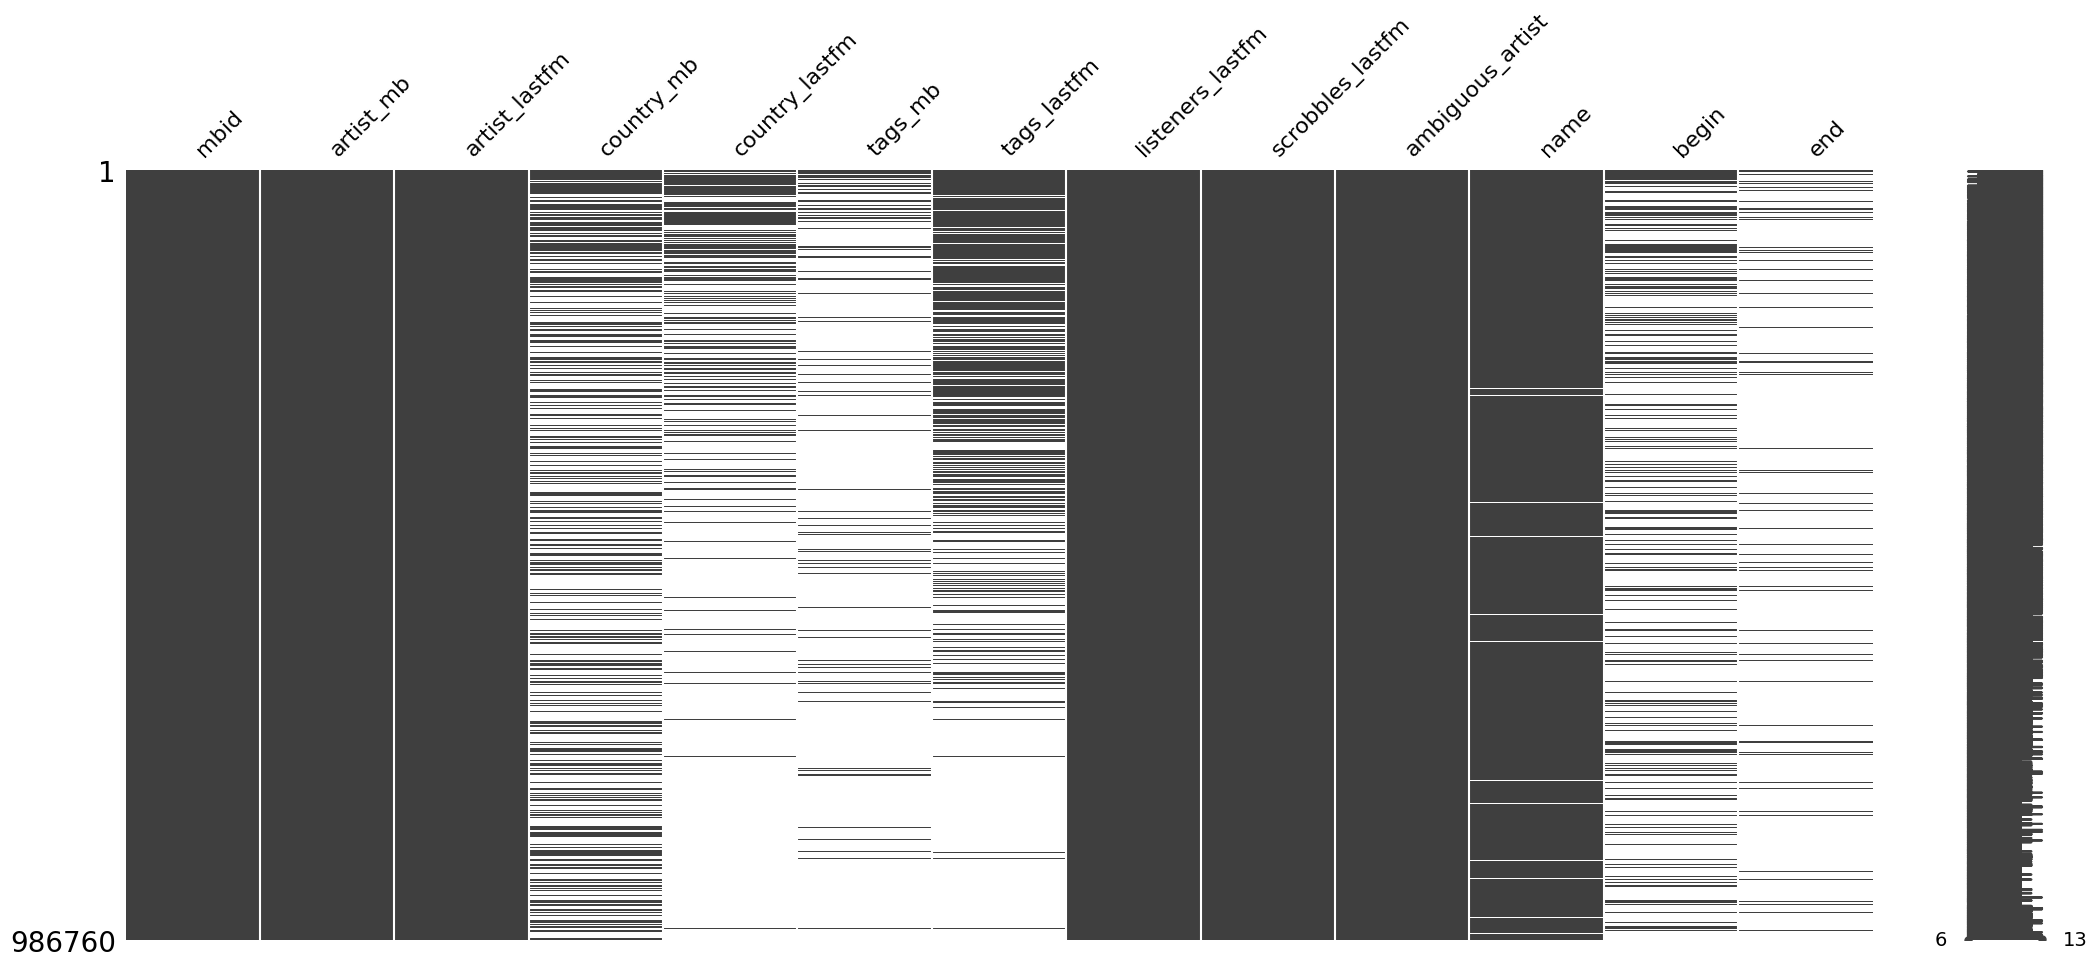

In [17]:
msno.matrix(df)

In [21]:
df['artist_mb'].nunique()

958883

# suivre .....................

In [19]:
df=df.drop_duplicates(subset=list(df.iloc[:, [1, 2, 3, 4,7,8 ,10,11]].columns))
df.shape
#1466083

(981599, 13)

<Axes: >

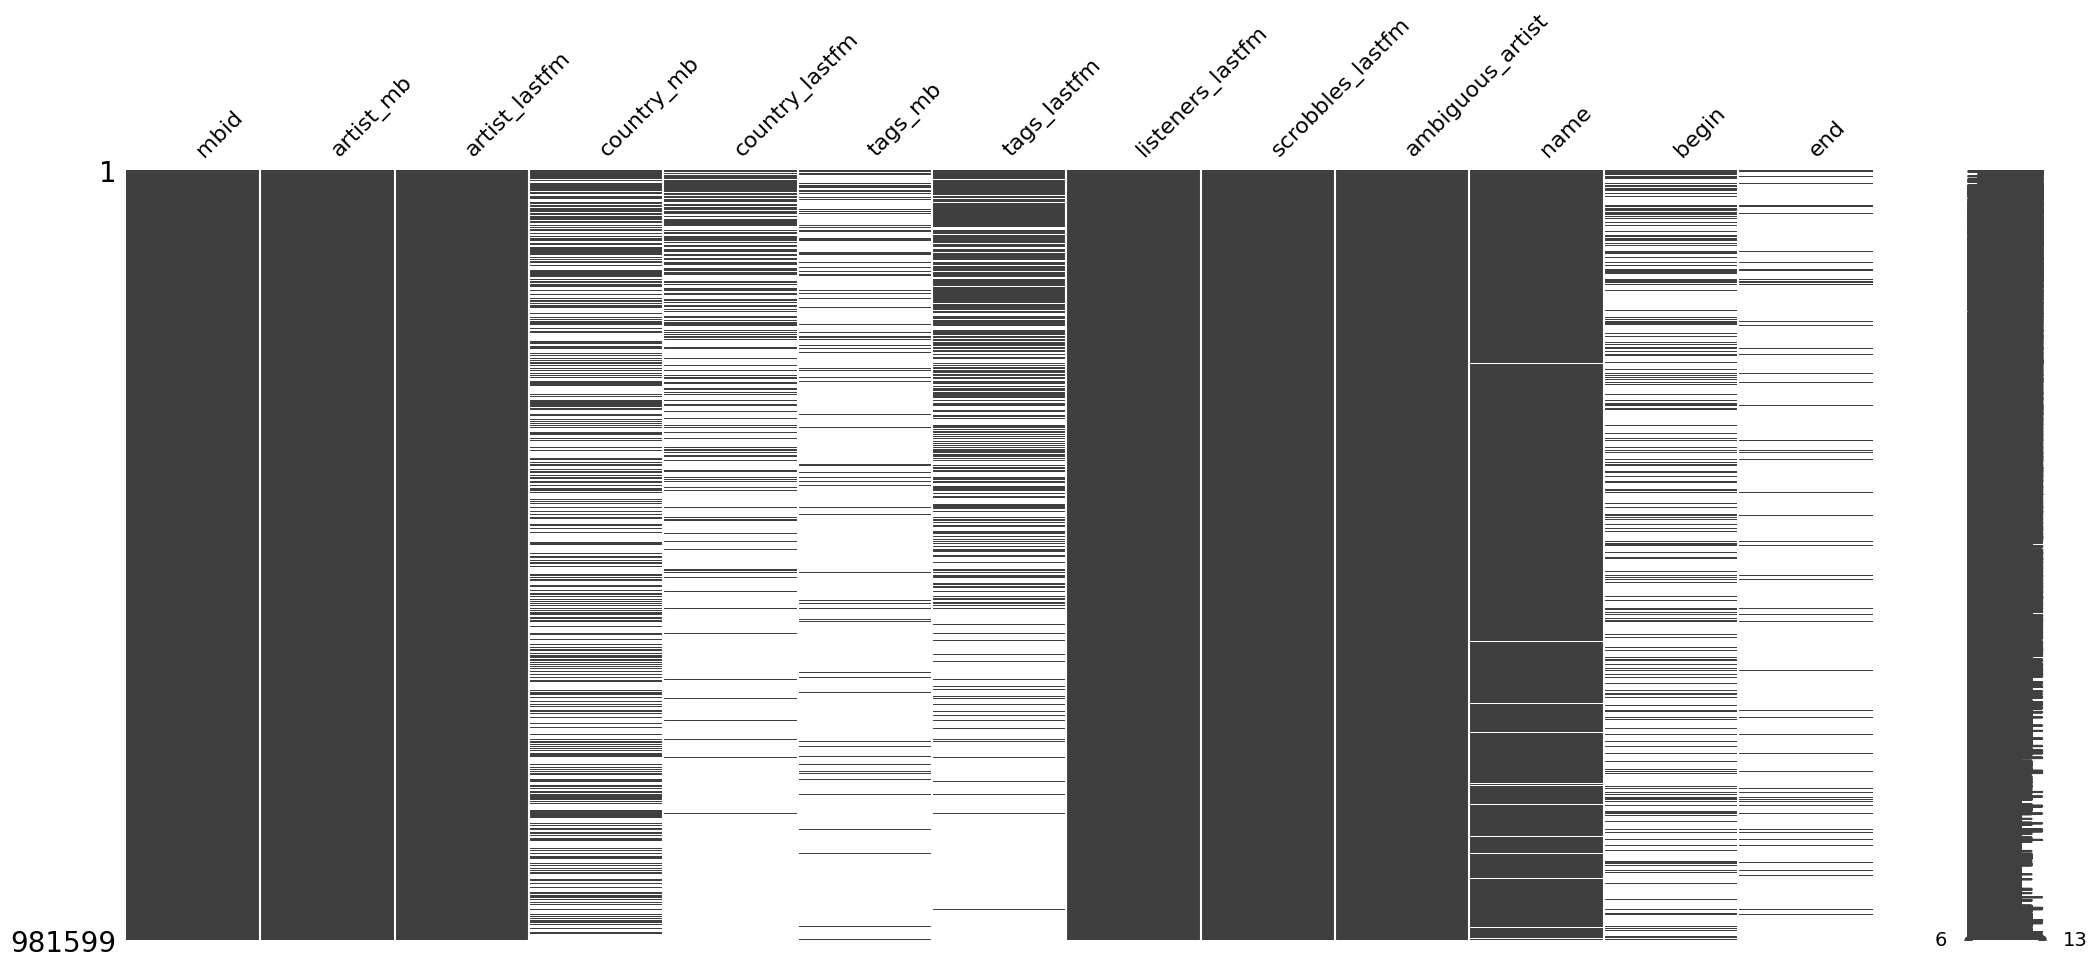

In [20]:
import missingno as msno
msno.matrix(df)

In [22]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

,0
mbid,0.000000
listeners_lastfm,0.000000
scrobbles_lastfm,0.000000
ambiguous_artist,0.000000
artist_lastfm,0.000005
artist_mb,0.000006
name,0.016200
country_mb,0.553875
tags_lastfm,0.616920
begin,0.719568


In [23]:
df[df['ambiguous_artist']==True]

,mbid,artist_mb,artist_lastfm,country_mb,country_lastfm,tags_mb,tags_lastfm,listeners_lastfm,scrobbles_lastfm,ambiguous_artist,name,begin,end
73,c234fa42-e6a6-443e-937e-2f4b073538a3,Chris Brown,Chris Brown,United States,United States,pop; dance; american; hip-hop; electropop; rnb...,rnb; Hip-Hop; Chris Brown; rap; hip hop; pop; ...,2624857.0,47604118.0,True,Chris Brown,1989,NaN
74,2c1828a2-e46b-4ade-a6e9-065ca265d679,Chris Brown,Chris Brown,United States,United States,NaN,rnb; Hip-Hop; Chris Brown; rap; hip hop; pop; ...,2624857.0,47604118.0,True,Chris Brown,NaN,NaN
76,548bae0a-223e-4825-a79f-951e1f737a84,Chris Brown,Chris Brown,United States,United States,american; usa; pianist; composer; musician; am...,rnb; Hip-Hop; Chris Brown; rap; hip hop; pop; ...,2624857.0,47604118.0,True,Chris Brown,1953,NaN
77,9329ee19-26d7-40cf-8ec0-ab761cb6180e,Christopher Brown,Chris Brown,United States,United States,NaN,rnb; Hip-Hop; Chris Brown; rap; hip hop; pop; ...,2624857.0,47604118.0,True,Christopher Brown,NaN,NaN
176,708cad63-631f-4a77-92fe-c046bb02d0c3,Phoenix,Phoenix,Romania,France; Romania,romanian; romanian band,indie; french; indie pop; seen live; electroni...,2030349.0,78553113.0,True,Phoenix,1962,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
983591,c280413c-8815-48d5-854e-c9790a02b0a2,Urge,Urge,United Kingdom,Brazil,NaN,screamo; rock; hardcore; Post punk; brazilian,0.0,0.0,True,Urge,NaN,NaN
983858,61a7f0e1-dc95-4fa4-bebf-8b28a787552f,Vincent Rees,Vincent Rees,United Kingdom,NaN,NaN,NaN,0.0,0.0,True,Vincent Rees,1960,NaN
983859,8ff35e61-2445-467b-85d9-5191fd0a530a,Vincent Rees,Vincent Rees,NaN,NaN,NaN,NaN,0.0,0.0,True,Vincent Rees,NaN,NaN
985245,e5ed7216-035b-418c-a4ee-d10954ff26c2,Umlaut,umlaut,NaN,NaN,NaN,rock; experimental; instrumental; alternative;...,0.0,0.0,True,Umlaut,2007,NaN


In [36]:
df1=df.loc[(df['artist_mb']==df['artist_lastfm']) & (df['country_mb'] != df['country_lastfm']) & (df['ambiguous_artist']==True)]
df1.head()

,mbid,artist_mb,artist_lastfm,country_mb,country_lastfm,tags_mb,tags_lastfm,listeners_lastfm,scrobbles_lastfm,ambiguous_artist,name,begin,end
176,708cad63-631f-4a77-92fe-c046bb02d0c3,Phoenix,Phoenix,Romania,France; Romania,romanian; romanian band,indie; french; indie pop; seen live; electroni...,2030349.0,78553113.0,True,Phoenix,1962,NaN
177,8d455809-96b3-4bb6-8829-ea4beb580d35,Phoenix,Phoenix,France,France; Romania,rock; alternative rock; french; france; franco...,indie; french; indie pop; seen live; electroni...,2030349.0,78553113.0,True,Phoenix,1999,NaN
178,99d7b49c-c18e-4a11-bf3e-b71710938df6,Phoenix,Phoenix,NaN,France; Romania,NaN,indie; french; indie pop; seen live; electroni...,2030349.0,78553113.0,True,Phoenix,NaN,NaN
179,b43bc0c9-5766-4717-bd9a-3abe2fa62a4d,Phoenix,Phoenix,United Kingdom,France; Romania,NaN,indie; french; indie pop; seen live; electroni...,2030349.0,78553113.0,True,Phoenix,1989,NaN
181,e24a90e9-7c05-4e2e-be61-9387aec73a64,Phoenix,Phoenix,Italy,France; Romania,NaN,indie; french; indie pop; seen live; electroni...,2030349.0,78553113.0,True,Phoenix,NaN,NaN


In [37]:
df1.drop_duplicates(subset=['listeners_lastfm','scrobbles_lastfm'])

,mbid,artist_mb,artist_lastfm,country_mb,country_lastfm,tags_mb,tags_lastfm,listeners_lastfm,scrobbles_lastfm,ambiguous_artist,name,begin,end
176,708cad63-631f-4a77-92fe-c046bb02d0c3,Phoenix,Phoenix,Romania,France; Romania,romanian; romanian band,indie; french; indie pop; seen live; electroni...,2030349.0,78553113.0,True,Phoenix,1962,NaN
204,f1b525b4-ddd0-4d39-85b2-d8fa26a7f279,Feist,Feist,NaN,Canada,NaN,female vocalists; indie; singer-songwriter; Ca...,1966716.0,68418397.0,True,Feist,NaN,NaN
256,1b34d22a-9f81-4a8a-83ba-00373e0cc6c4,Jet,Jet,Denmark,Australia,NaN,rock; alternative; alternative rock; indie; in...,1754155.0,24002742.0,True,Jet,NaN,NaN
517,8b8a38a9-a290-4560-84f6-3d4466e8d791,John Williams,John Williams,Australia,United States,classical; guitarist; orchestral; guitar; prod...,Soundtrack; Classical; instrumental; composers...,1203493.0,38368992.0,True,John Williams,1941,NaN
761,6617f55e-c0c0-490d-9855-02c9c30091d9,Passenger,Passenger,Sweden,Sweden; United Kingdom; United States,classic pop and rock,folk; Melodic Death Metal; alternative metal; ...,928517.0,19998736.0,True,Passenger,1996,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
844177,09c14f68-3a26-4003-9754-92d19e9bef35,Ralph Hermann,Ralph Hermann,United States,NaN,NaN,NaN,3.0,5.0,True,Ralph Hermann,1914,1994
879748,1d116627-530a-4289-bb19-956e9700f482,The Bobbins,The Bobbins,NaN,NaN,NaN,NaN,2.0,3.0,True,The Bobbins,1989,1990
925572,ededd2f8-a2e4-4ed3-95c1-5fd45b5e7eab,Paul Neville,Paul Neville,United Kingdom,NaN,NaN,NaN,1.0,3.0,True,Paul Neville,NaN,NaN
928437,40c38662-5879-4b27-a0eb-073c6a77a5c5,Red Eyed Frogs,Red Eyed Frogs,NaN,NaN,NaN,NaN,1.0,12.0,True,Red Eyed Frogs,NaN,NaN


# rafik

In [ ]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

mbid                0.000000
ambiguous_artist    0.000000
artist_mb           0.000009
name                0.016243
listeners_lastfm    0.326941
scrobbles_lastfm    0.326941
artist_lastfm       0.326945
country_mb          0.548206
tags_lastfm         0.740073
begin               0.757155
country_lastfm      0.855739
tags_mb             0.918186
end                 0.933103
dtype: float64

In [ ]:
df['tags_mb'] = df['tags_mb'].fillna(df['tags_lastfm'])
df['tags_lastfm'] = df['tags_lastfm'].fillna(df['tags_mb'])
df['name'] = df['name'].fillna(df['tags_mb'])

In [ ]:
df['country_mb'] = df['country_mb'].fillna(df['tags_lastfm'])
df['country_lastfm'] = df['country_lastfm'].fillna(df['country_mb'])

In [ ]:
df['artist_mb'] = df['artist_mb'].fillna(df['artist_lastfm'])
df['artist_lastfm'] = df['artist_lastfm'].fillna(df['artist_mb'])

In [ ]:
df.shape

(21404, 13)

In [ ]:
df=df.drop_duplicates(subset=list(df.iloc[:, [1, 2, 3, 4, 10]].columns))
df.shape

(20790, 13)

In [ ]:
df['end']=df['end'].fillna(2024)

<Axes: >

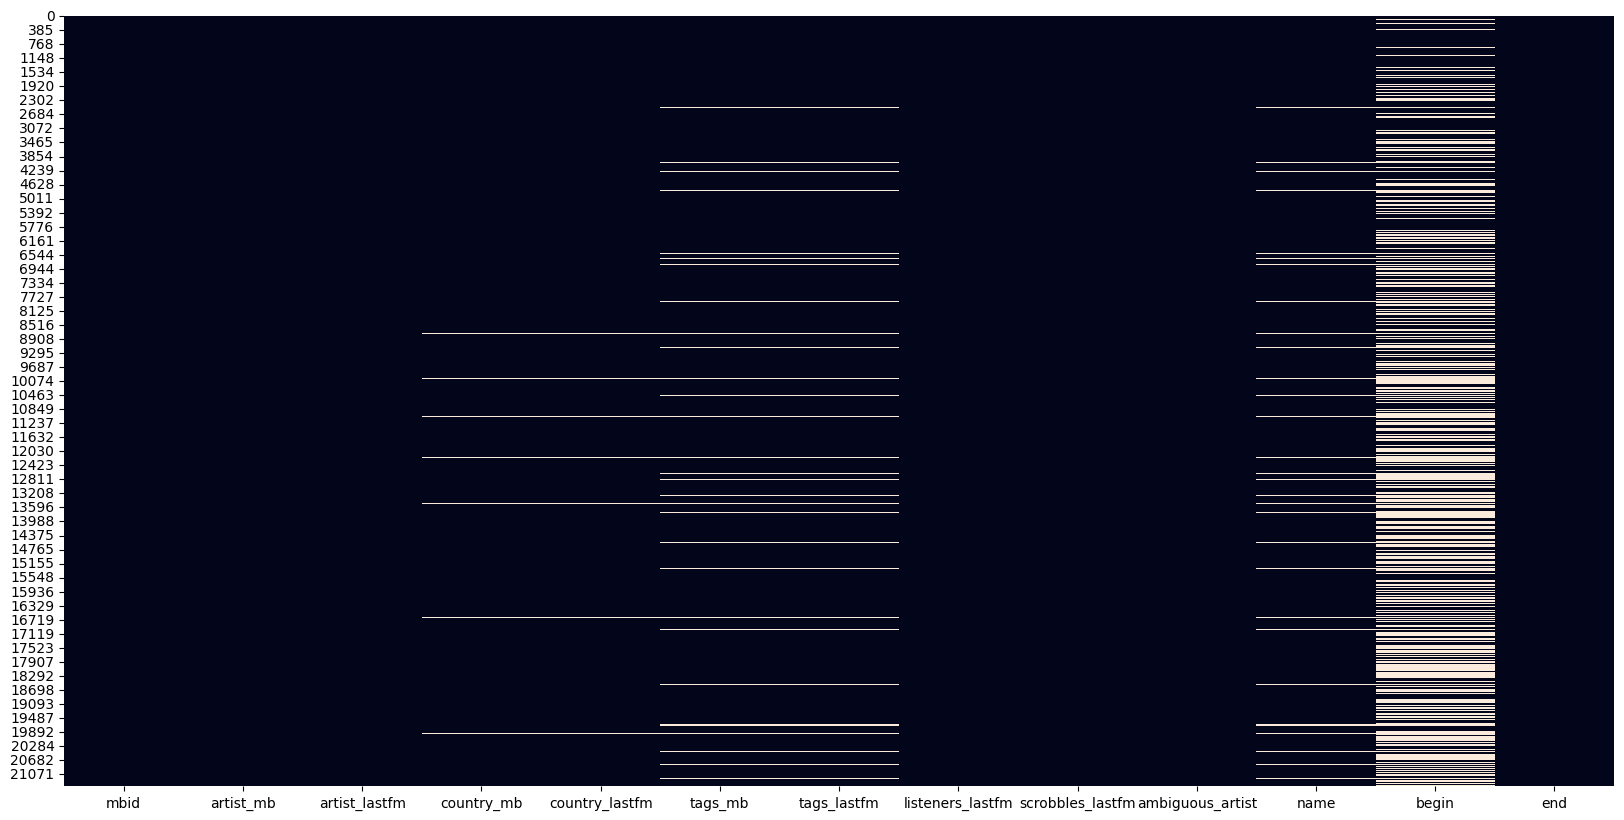

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)